<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [32]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import seaborn as sns
import matplotlib.pyplot as plt

# Start coding!

In [33]:
# import csv file
file = 'car_insurance.csv'
df = pd.read_csv(file)
# Identify missing values
df.isnull().sum()/df.shape[0]*100
print(df['credit_score'].describe())
print(df['annual_mileage'].describe())

count    9018.000000
mean        0.515813
std         0.137688
min         0.053358
25%         0.417191
50%         0.525033
75%         0.618312
max         0.960819
Name: credit_score, dtype: float64
count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: annual_mileage, dtype: float64


In [34]:
# Fill na with mean
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())
df.isnull().sum()

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

- Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the "outcome" column), excluding the "id" column.

- Store as a DataFrame called best_feature_df, containing columns named "best_feature" and "best_accuracy" with the name of the feature with the highest accuracy, and the respective accuracy score.

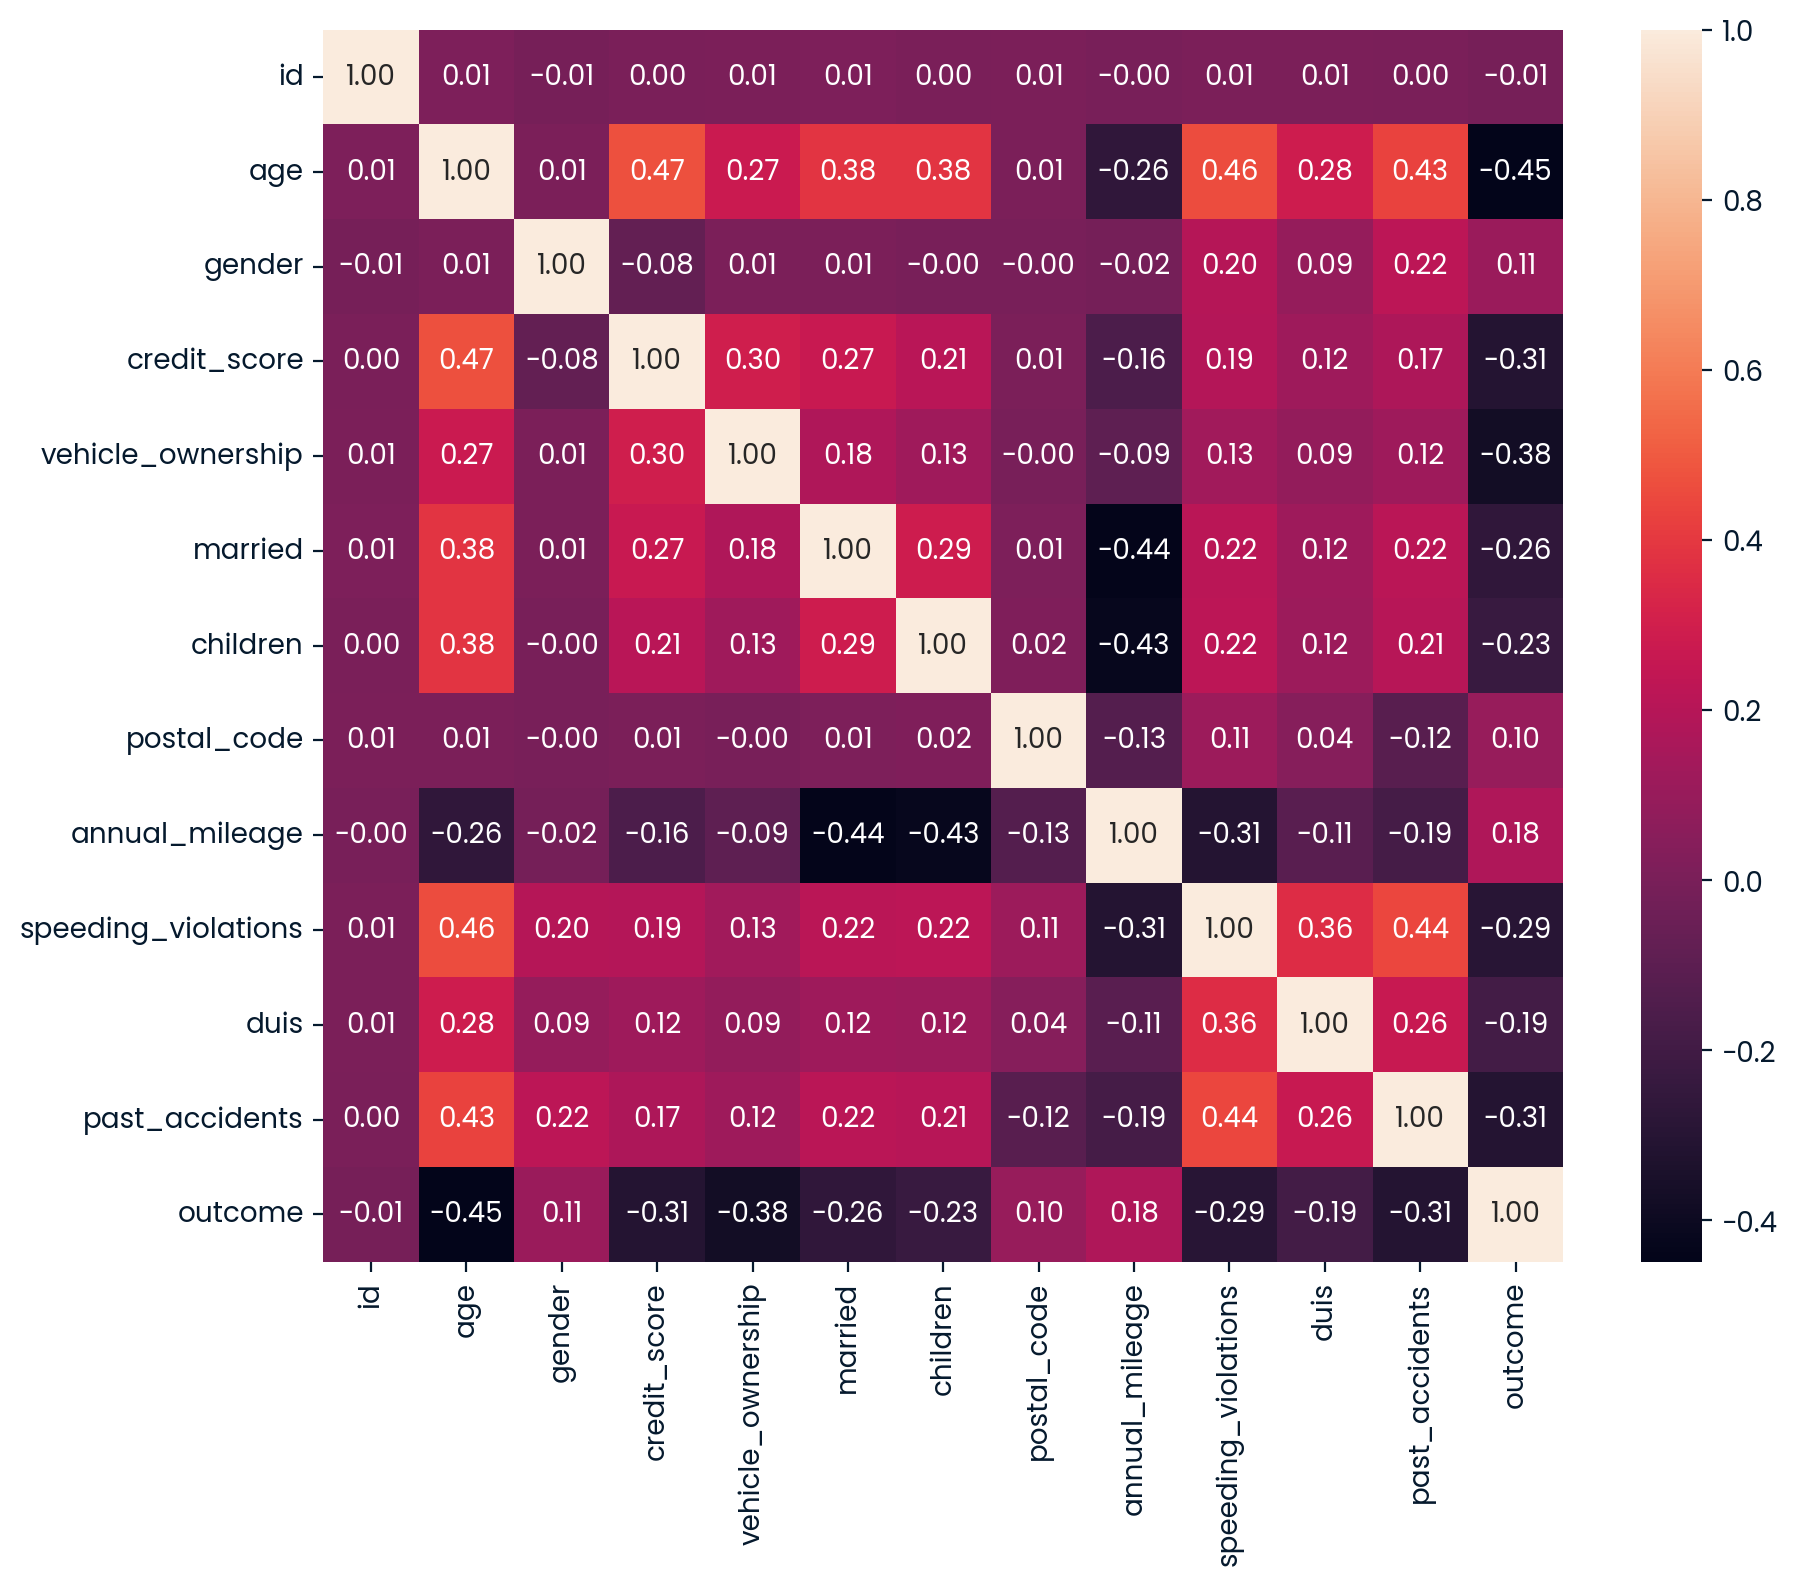

In [35]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [36]:
# Create a function to calculate regression and accuracy to each feature
def model_per_feature(df, target_column, input_column):
    mdl_age_outcomes = logit(f'{target_column} ~ {input_column}', data=df).fit()

    # Calculate the confusion matrix
    conf_matrix = mdl_age_outcomes.pred_table()
    
    # Calculate the accuracy
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    
    acc = (TN + TP) / (TN + TP + FN + FP)

    return acc

In [37]:
# Create dictionary to store the accuracies 
models_dict = {}

target_column = 'outcome'

input_columns = [x for x in df.columns if x != target_column]

for col in input_columns:
    model_acc = model_per_feature(df, target_column, col)
    models_dict[col] = np.round(model_acc, 2)

Optimization terminated successfully.
         Current function value: 0.621660
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
  

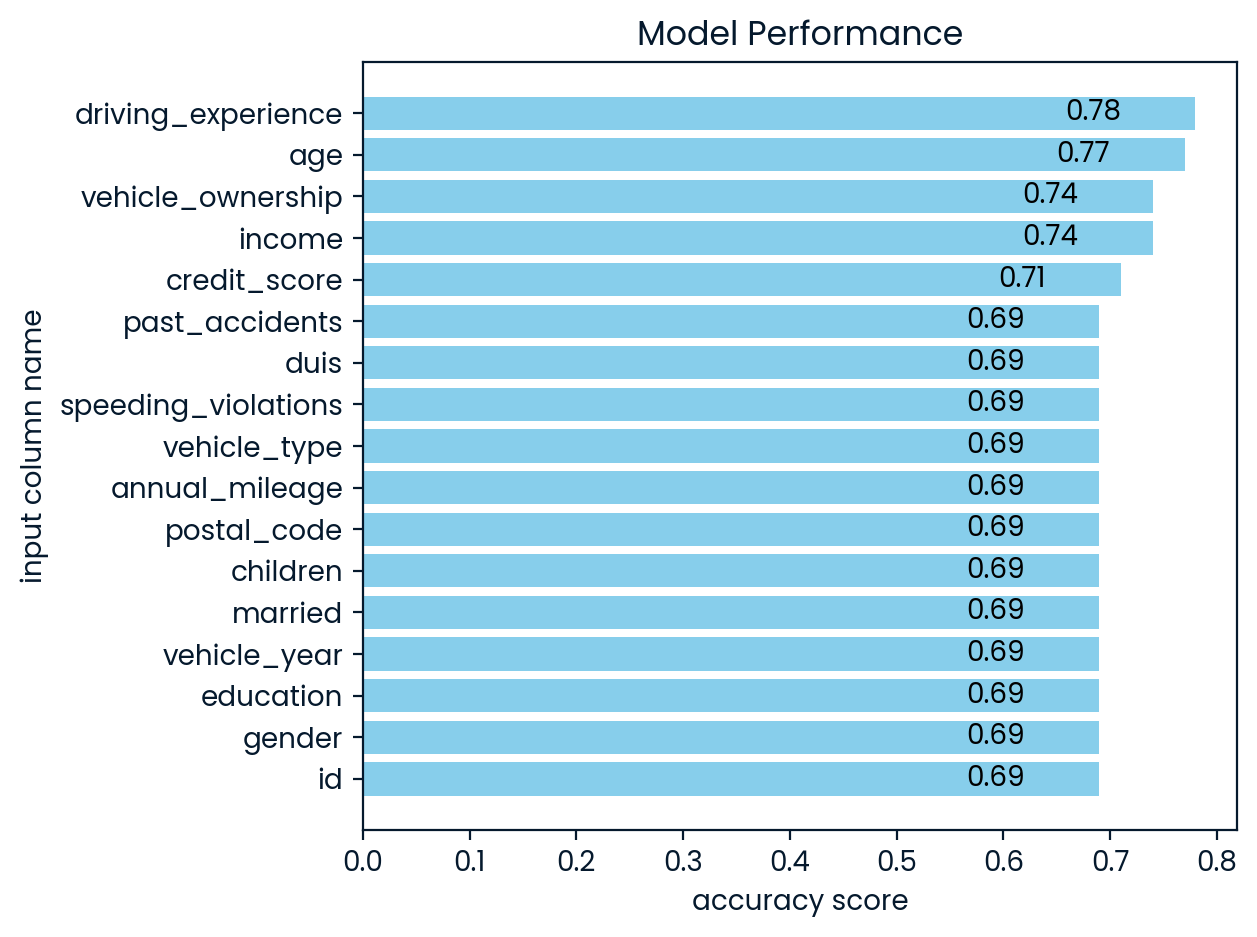

In [38]:
models_dict = dict(sorted(models_dict.items(),key=lambda x: x[1]))
model_names = list(models_dict.keys())
model_values = list(models_dict.values())
bars = plt.barh(model_names, model_values, color='skyblue')
for bar, value in zip(bars, model_values):
    plt.text(value - 0.07, bar.get_y() + bar.get_height()/2,
            f'{value:.2f}', va='center', ha='right', color='black', fontsize=10)

plt.xlabel('accuracy score')
plt.ylabel('input column name')
plt.title('Model Performance')
plt.tight_layout()
plt.show()

In [39]:
# Identify the best feature
best_feature_name = max(models_dict, key=models_dict.get)
best_feature_value = max(models_dict.values())
print(f'Best Feature: {best_feature_name} : {best_feature_value}')

Best Feature: driving_experience : 0.78


In [40]:
# Create DataFrame
best_feature_df = pd.DataFrame({"best_feature":[best_feature_name], "best_accuracy": [best_feature_value]})
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.78
